## Data Preparation

After loading the data, the datatype of REF_DATE was changed to datetime format and the data is trimmed to range from "1986-01-01" till "2024-10-01".

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = "merged_data.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Convert REF_DATE to datetime format
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Define the date range
start_date = "1986-01-01"
end_date = "2024-10-01"

# Filter the dataset
df_trimmed = df[(df['REF_DATE'] >= start_date) & (df['REF_DATE'] <= end_date)]

# Display the first few rows of the trimmed dataset
print(df_trimmed.head())

# Save the trimmed dataset if needed
df_trimmed.to_csv("Trimmed_Time_Series_Data.csv", index=False)

      Unnamed: 0   REF_DATE                        GEO  Number_of_Households  \
1071        1071 1986-01-01                    Alberta                   859   
1072        1072 1986-01-01           British Columbia                  1132   
1073        1073 1986-01-01                   Manitoba                   392   
1074        1074 1986-01-01              New Brunswick                   237   
1075        1075 1986-01-01  Newfoundland and Labrador                   161   

      Housing completions  Housing starts  Housing under construction  \
1071               4130.0          3778.1                      7477.0   
1072               9185.0         11098.4                     23454.0   
1073               3327.0          4076.4                     10631.0   
1074               2190.0           749.3                      3453.0   
1075               1145.0           507.7                      6337.0   

      House only NHPI  Land only NHPI  Total (house and land) NHPI  
1071       

Checking data structure and quality

In [7]:
# Check data structure and quality
print("Dataset Information:")
df_trimmed.info()
print("\nMissing Values:")
print(df_trimmed.isnull().sum())
print("\nBasic Statistics:")
print(df_trimmed.describe())
print("\nUnique Values:")
print(df_trimmed.nunique())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 1071 to 5264
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   4194 non-null   int64         
 1   REF_DATE                     4194 non-null   datetime64[ns]
 2   GEO                          4194 non-null   object        
 3   Number_of_Households         4194 non-null   int64         
 4   Housing completions          4194 non-null   float64       
 5   Housing starts               4194 non-null   float64       
 6   Housing under construction   4194 non-null   float64       
 7   House only NHPI              4086 non-null   float64       
 8   Land only NHPI               4086 non-null   float64       
 9   Total (house and land) NHPI  4086 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 360.4+ KB

Missing Va

Handle missing values


In [8]:
# Exclude non-numeric columns before performing numerical operations
numeric_cols = df_trimmed.select_dtypes(include=[np.number]).columns

# Interpolation to fill in missing values with a smooth trend, avoiding sudden jumps
df_trimmed[numeric_cols] = df_trimmed[numeric_cols].interpolate(method='linear')

# Fill remaining missing values with the median of each numeric column to prevent extreme values from skewing data
# Handle columns that still have missing values explicitly
for col in numeric_cols:
    if df_trimmed[col].isnull().sum() > 0:
        df_trimmed[col].fillna(df_trimmed[col].median(), inplace=True)


C:\Users\schac\AppData\Local\Temp\ipykernel_24924\2040667778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[numeric_cols] = df_trimmed[numeric_cols].interpolate(method='linear')


In [9]:
# Check data structure after handling missing values
print("Dataset Information: After Handling Missing Values")
df_trimmed.info()
print("\nMissing Values After Handling:")
print(df_trimmed.isnull().sum())

Dataset Information: After Handling Missing Values
<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 1071 to 5264
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   4194 non-null   int64         
 1   REF_DATE                     4194 non-null   datetime64[ns]
 2   GEO                          4194 non-null   object        
 3   Number_of_Households         4194 non-null   int64         
 4   Housing completions          4194 non-null   float64       
 5   Housing starts               4194 non-null   float64       
 6   Housing under construction   4194 non-null   float64       
 7   House only NHPI              4194 non-null   float64       
 8   Land only NHPI               4194 non-null   float64       
 9   Total (house and land) NHPI  4194 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memor

## Feature Engineering


In [10]:
# Extract year, month, quarter, and day to enable seasonal and trend analysis
df_trimmed['Year'] = df_trimmed['REF_DATE'].dt.year
df_trimmed['Month'] = df_trimmed['REF_DATE'].dt.month
df_trimmed['Quarter'] = df_trimmed['REF_DATE'].dt.quarter
df_trimmed['Day'] = df_trimmed['REF_DATE'].dt.day

C:\Users\schac\AppData\Local\Temp\ipykernel_24924\2006355810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['Year'] = df_trimmed['REF_DATE'].dt.year
C:\Users\schac\AppData\Local\Temp\ipykernel_24924\2006355810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['Month'] = df_trimmed['REF_DATE'].dt.month
C:\Users\schac\AppData\Local\Temp\ipykernel_24924\2006355810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [11]:
# Check structure after feature engineering
print("Dataset Information: After Feature Engineering")
df_trimmed.info()
df_trimmed.head()


Dataset Information: After Feature Engineering
<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 1071 to 5264
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   4194 non-null   int64         
 1   REF_DATE                     4194 non-null   datetime64[ns]
 2   GEO                          4194 non-null   object        
 3   Number_of_Households         4194 non-null   int64         
 4   Housing completions          4194 non-null   float64       
 5   Housing starts               4194 non-null   float64       
 6   Housing under construction   4194 non-null   float64       
 7   House only NHPI              4194 non-null   float64       
 8   Land only NHPI               4194 non-null   float64       
 9   Total (house and land) NHPI  4194 non-null   float64       
 10  Year                         4194 non-null   int32         
 11

,Unnamed: 0,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI,Year,Month,Quarter,Day
1071,1071,1986-01-01,Alberta,859,4130.0,3778.1,7477.0,28.0,22.5,26.4,1986,1,1,1
1072,1072,1986-01-01,British Columbia,1132,9185.0,11098.4,23454.0,79.5,49.2,66.3,1986,1,1,1
1073,1073,1986-01-01,Manitoba,392,3327.0,4076.4,10631.0,37.7,26.9,34.7,1986,1,1,1
1074,1074,1986-01-01,New Brunswick,237,2190.0,749.3,3453.0,75.1,56.1,70.5,1986,1,1,1
1075,1075,1986-01-01,Newfoundland and Labrador,161,1145.0,507.7,6337.0,39.4,35.3,38.7,1986,1,1,1


Creating Lag Features (Using 1, 3, and 6 months lag).
These help the model recognize past patterns and predict future trends

In [12]:
lag_columns = ['Number_of_Households', 'Housing completions', 'Housing starts',
               'Housing under construction', 'House only NHPI', 'Land only NHPI',
               'Total (house and land) NHPI']

for col in lag_columns:
    for lag in [1, 3, 6]:  # Using past values from 1, 3, and 6 months ago to capture short- and mid-term trends
        df_trimmed[f'{col}_lag_{lag}'] = df_trimmed[col].shift(lag)

C:\Users\schac\AppData\Local\Temp\ipykernel_24924\3796361458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[f'{col}_lag_{lag}'] = df_trimmed[col].shift(lag)
C:\Users\schac\AppData\Local\Temp\ipykernel_24924\3796361458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[f'{col}_lag_{lag}'] = df_trimmed[col].shift(lag)
C:\Users\schac\AppData\Local\Temp\ipykernel_24924\3796361458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [13]:
# Check structure after creating lag features
print("Dataset Information: After Lag Features")
df_trimmed.info()
df_trimmed.head()

Dataset Information: After Lag Features
<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 1071 to 5264
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         4194 non-null   int64         
 1   REF_DATE                           4194 non-null   datetime64[ns]
 2   GEO                                4194 non-null   object        
 3   Number_of_Households               4194 non-null   int64         
 4   Housing completions                4194 non-null   float64       
 5   Housing starts                     4194 non-null   float64       
 6   Housing under construction         4194 non-null   float64       
 7   House only NHPI                    4194 non-null   float64       
 8   Land only NHPI                     4194 non-null   float64       
 9   Total (house and land) NHPI        4194 non-null   float64       
 10

,Unnamed: 0,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI,...,Housing under construction_lag_6,House only NHPI_lag_1,House only NHPI_lag_3,House only NHPI_lag_6,Land only NHPI_lag_1,Land only NHPI_lag_3,Land only NHPI_lag_6,Total (house and land) NHPI_lag_1,Total (house and land) NHPI_lag_3,Total (house and land) NHPI_lag_6
1071,1071,1986-01-01,Alberta,859,4130.0,3778.1,7477.0,28.0,22.5,26.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,1072,1986-01-01,British Columbia,1132,9185.0,11098.4,23454.0,79.5,49.2,66.3,...,NaN,28.0,NaN,NaN,22.5,NaN,NaN,26.4,NaN,NaN
1073,1073,1986-01-01,Manitoba,392,3327.0,4076.4,10631.0,37.7,26.9,34.7,...,NaN,79.5,NaN,NaN,49.2,NaN,NaN,66.3,NaN,NaN
1074,1074,1986-01-01,New Brunswick,237,2190.0,749.3,3453.0,75.1,56.1,70.5,...,NaN,37.7,28.0,NaN,26.9,22.5,NaN,34.7,26.4,NaN
1075,1075,1986-01-01,Newfoundland and Labrador,161,1145.0,507.7,6337.0,39.4,35.3,38.7,...,NaN,75.1,79.5,NaN,56.1,49.2,NaN,70.5,66.3,NaN


Creating Rolling Mean Features (3-month moving average) which smooths out fluctuations to highlight long-term trends.

In [14]:
for col in lag_columns:
    df_trimmed[f'{col}_rolling_mean_3'] = df_trimmed[col].rolling(window=3).mean()

# Drop rows with NaN values introduced by shifting (since lag features create missing values at the start)
df_trimmed.dropna(inplace=True)

C:\Users\schac\AppData\Local\Temp\ipykernel_24924\606026694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[f'{col}_rolling_mean_3'] = df_trimmed[col].rolling(window=3).mean()
C:\Users\schac\AppData\Local\Temp\ipykernel_24924\606026694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[f'{col}_rolling_mean_3'] = df_trimmed[col].rolling(window=3).mean()
C:\Users\schac\AppData\Local\Temp\ipykernel_24924\606026694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [15]:
print("Dataset Information: After Final Cleaning")
df_trimmed.info()
df_trimmed.head()


Dataset Information: After Final Cleaning
<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 1077 to 5264
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Unnamed: 0                                  4188 non-null   int64         
 1   REF_DATE                                    4188 non-null   datetime64[ns]
 2   GEO                                         4188 non-null   object        
 3   Number_of_Households                        4188 non-null   int64         
 4   Housing completions                         4188 non-null   float64       
 5   Housing starts                              4188 non-null   float64       
 6   Housing under construction                  4188 non-null   float64       
 7   House only NHPI                             4188 non-null   float64       
 8   Land only NHPI                              4188

,Unnamed: 0,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI,...,Total (house and land) NHPI_lag_1,Total (house and land) NHPI_lag_3,Total (house and land) NHPI_lag_6,Number_of_Households_rolling_mean_3,Housing completions_rolling_mean_3,Housing starts_rolling_mean_3,Housing under construction_rolling_mean_3,House only NHPI_rolling_mean_3,Land only NHPI_rolling_mean_3,Total (house and land) NHPI_rolling_mean_3
1077,1077,1986-01-01,Prince Edward Island,41,559.000000,309.100000,672.000000,36.65,38.6,37.6,...,36.7,70.5,26.4,1177.000000,10371.333333,8197.900000,30923.333333,36.350000,39.400000,37.666667
1078,1078,1986-01-01,Quebec,2421,19363.000000,22534.800000,61534.000000,40.30,32.9,38.5,...,37.6,38.7,66.3,1930.333333,16444.000000,15540.266667,49322.333333,36.650000,38.600000,37.600000
1079,1079,1986-01-01,Canada,9238,77598.000000,71934.400000,211817.000000,39.40,38.8,39.8,...,38.5,36.7,34.7,3900.000000,32506.666667,31592.766667,91341.000000,38.783333,36.766667,38.633333
1080,1080,1986-02-01,Alberta,859,4102.956522,2141.282609,5102.304348,28.50,22.5,26.8,...,39.8,37.6,70.5,4172.666667,33687.985507,32203.494203,92817.768116,36.066667,31.400000,35.033333
1081,1081,1986-02-01,British Columbia,1132,4179.913043,2271.565217,5184.608696,79.60,49.4,66.4,...,26.8,38.5,38.7,3743.000000,28626.956522,25449.082609,74034.637681,49.166667,36.900000,44.333333


Plotting time series trends for key variables after missing value handling


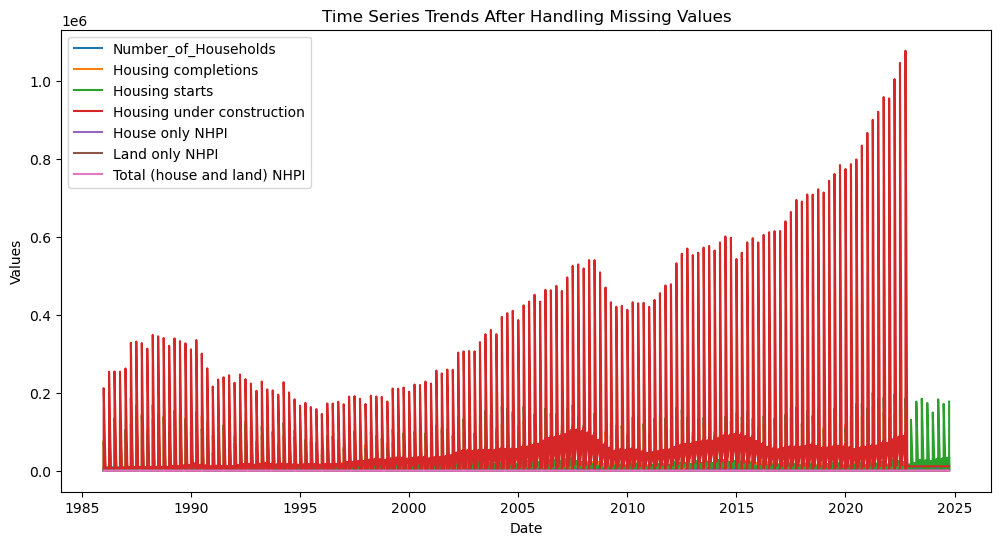

In [16]:
plt.figure(figsize=(12, 6))
for col in lag_columns:
    plt.plot(df_trimmed['REF_DATE'], df_trimmed[col], label=col)
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series Trends After Handling Missing Values")
plt.legend()
plt.show()

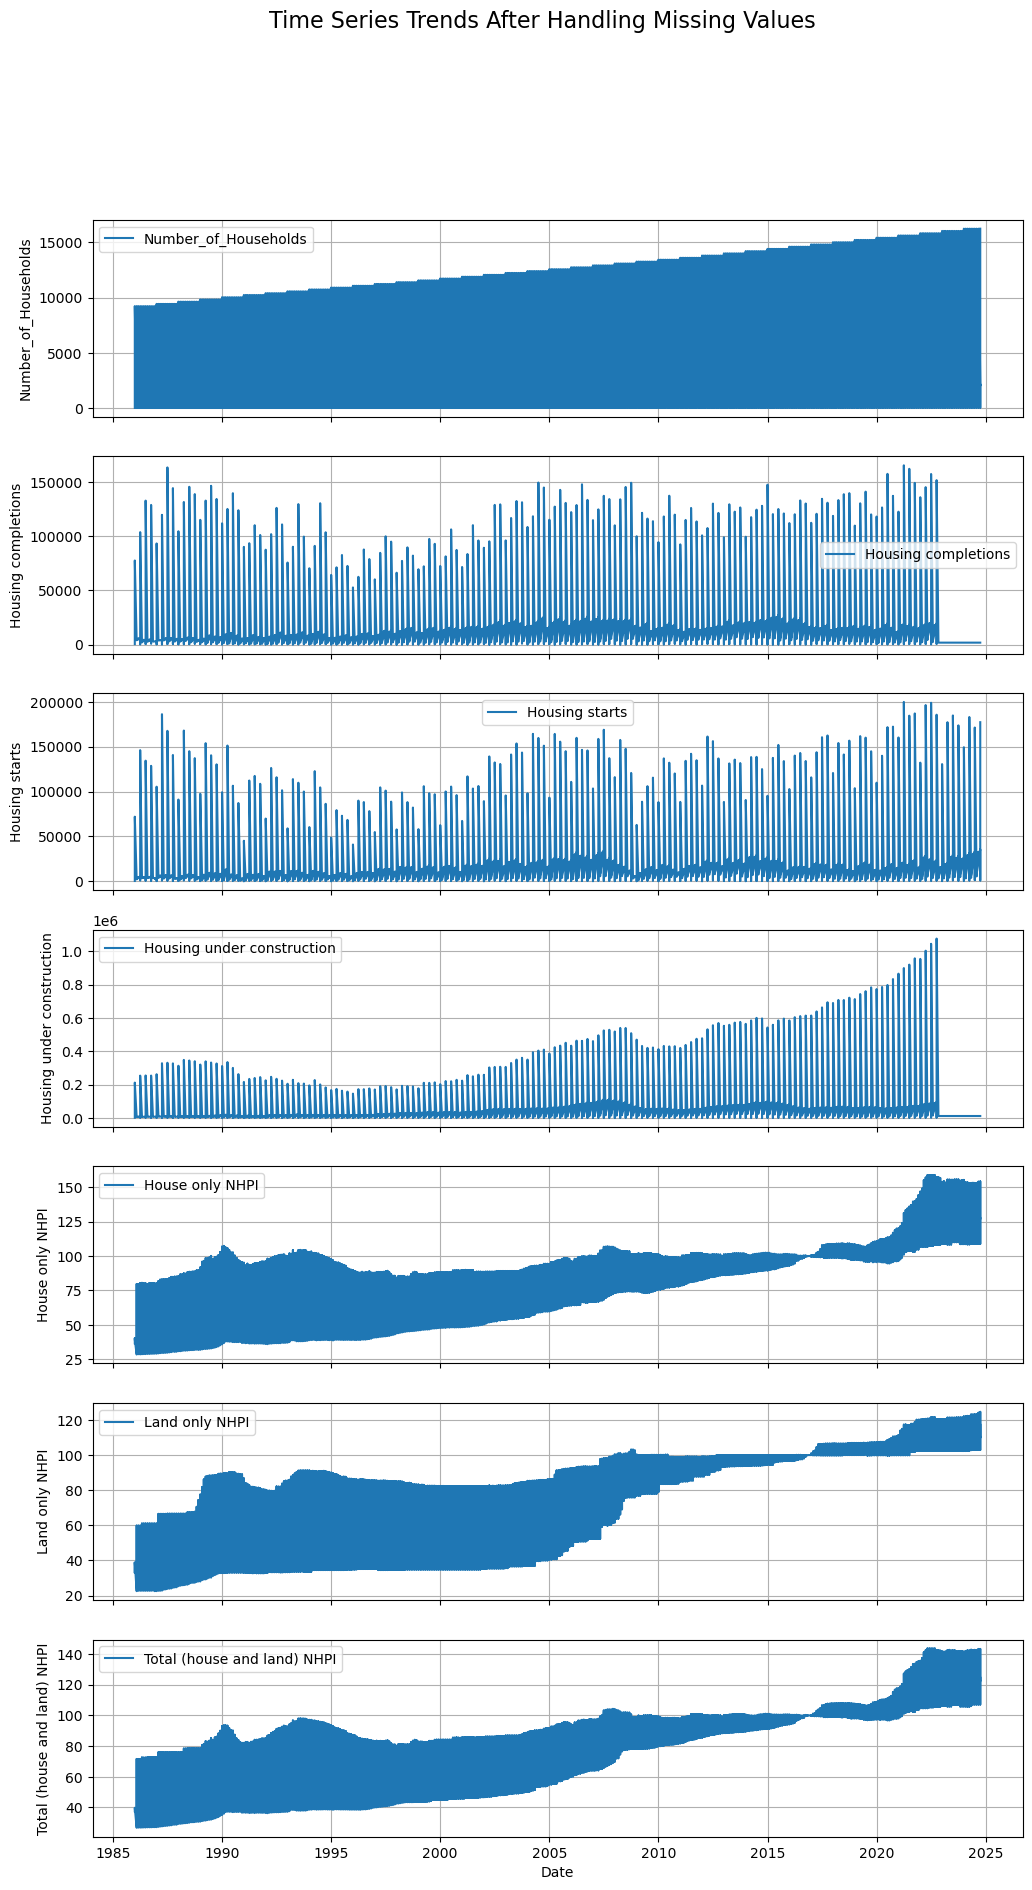

In [17]:
fig, axes = plt.subplots(len(lag_columns), 1, figsize=(12, 3 * len(lag_columns)), sharex=True)
fig.suptitle("Time Series Trends After Handling Missing Values", fontsize=16)

for i, col in enumerate(lag_columns):
    axes[i].plot(df_trimmed['REF_DATE'], df_trimmed[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid()

plt.xlabel("Date")
plt.show()


In [18]:
df_trimmed.tail()

,Unnamed: 0,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI,...,Total (house and land) NHPI_lag_1,Total (house and land) NHPI_lag_3,Total (house and land) NHPI_lag_6,Number_of_Households_rolling_mean_3,Housing completions_rolling_mean_3,Housing starts_rolling_mean_3,Housing under construction_rolling_mean_3,House only NHPI_rolling_mean_3,Land only NHPI_rolling_mean_3,Total (house and land) NHPI_rolling_mean_3
5260,5260,2024-10-01,Newfoundland and Labrador,220,1900.0,1139.0,11293.0,108.8,105.7,107.1,...,120.0,126.6,143.3,373.333333,1900.0,3653.000000,11293.0,128.133333,106.033333,122.433333
5261,5261,2024-10-01,Ontario,5984,1900.0,44919.0,11293.0,125.9,118.6,123.6,...,107.1,140.2,125.0,2180.333333,1900.0,16861.333333,11293.0,118.733333,109.066667,116.900000
5262,5262,2024-10-01,Prince Edward Island,68,1900.0,921.0,11293.0,127.0,104.5,122.6,...,123.6,120.0,122.2,2090.666667,1900.0,15659.666667,11293.0,120.566667,109.600000,117.766667
5263,5263,2024-10-01,Quebec,3908,1900.0,43892.0,11293.0,150.2,124.6,143.3,...,122.6,107.1,126.6,3320.000000,1900.0,29910.666667,11293.0,134.366667,115.900000,129.833333
5264,5264,2024-10-01,Canada,16233,1900.0,177228.0,11293.0,127.3,117.2,124.5,...,143.3,123.6,140.2,6736.333333,1900.0,74013.666667,11293.0,134.833333,115.433333,130.133333


 Saving the cleaned dataset to avoid reprocessing later

In [19]:
#df_trimmed.to_csv("Processed_Time_Series_Data.csv", index=False)